In [64]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
import matplotlib.pyplot as plt

# Muat MNIST Dataset
Gunakan sklearn.datasets untuk memuat MNIST dataset dan lakukan preprocessing data untuk PCA dan logistic regression

In [65]:
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data
y = mnist.target

X = X / 255.0

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Gunakan PCA untuk Mereduksi Dimensi
Terapkan PCA untuk reduksi dimensi pada MNIST dataset.

In [66]:
pca = PCA()
pca.fit(X_train)

explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# PCA dengan 10 Components
Gunakan PCA untuk reduksi dataset ke 10 components.

In [67]:
pca_10 = PCA(n_components=10)
X_train_pca_10 = pca_10.fit_transform(X_train)
X_test_pca_10 = pca_10.transform(X_test)

# PCA dengan 30 Components
Gunakan PCA untuk reduksi dataset ke 30 components.

In [68]:
pca_30 = PCA(n_components=30)
X_train_pca_30 = pca_30.fit_transform(X_train)
X_test_pca_30 = pca_30.transform(X_test)

# PCA dengan 50 Components
Gunakan PCA untuk reduksi dataset ke 50 components.

In [69]:
pca_50 = PCA(n_components=50)
X_train_pca_50 = pca_50.fit_transform(X_train)
X_test_pca_50 = pca_50.transform(X_test)

# Latih Logistic Regression Models
Latih Logistic Regression models pada dataset yang direduksi ke 10, 30, dan 50 components.

## Latih Model Pada 10 Components
Latih sebuah Logistic Regression model menggunakan dataset yang direduksi ke 10 components.

In [71]:
log_reg_10 = LogisticRegression(max_iter=1000, random_state=42)
log_reg_10.fit(X_train_pca_10, y_train)

y_pred_10 = log_reg_10.predict(X_test_pca_10)
accuracy_10 = accuracy_score(y_test, y_pred_10)
print(f"Akurasi dengan 10 component: {accuracy_10}")

Akurasi dengan 10 component: 0.8035714285714286


## Latih Model pada 30 Component
Latih sebuah Logistic Regression model menggunakan dataset yang direduksi ke 30 component.

In [72]:
log_reg_30 = LogisticRegression(max_iter=1000, random_state=42)
log_reg_30.fit(X_train_pca_30, y_train)

y_pred_30 = log_reg_30.predict(X_test_pca_30)
accuracy_30 = accuracy_score(y_test, y_pred_30)
print(f"Akurasi dengan 30 component: {accuracy_30}")

Akurasi dengan 30 component: 0.8925


## Latih Model pada 50 Component
Latih sebuah Logistic Regression model menggunakan dataset yang direduksi ke 50 component.

In [73]:
log_reg_50 = LogisticRegression(max_iter=1000, random_state=42)
log_reg_50.fit(X_train_pca_50, y_train)

y_pred_50 = log_reg_50.predict(X_test_pca_50)
accuracy_50 = accuracy_score(y_test, y_pred_50)
print(f"Akurasi dengan 50 component: {accuracy_50}")

Akurasi dengan 50 component: 0.9082857142857143


# Bandingkan Model Akurasi
Bandingkan akurasi dari Logistic Regression model yang telah dilatih pada dataset dengan 10, 30, dan 50 component.

In [74]:
# Compare Accuracies
print(f"Akurasi dengan 10 component: {accuracy_10}")
print(f"Akurasi dengan 30 component: {accuracy_30}")
print(f"Akurasi dengan 50 component: {accuracy_50}")

Akurasi dengan 10 component: 0.8035714285714286
Akurasi dengan 30 component: 0.8925
Akurasi dengan 50 component: 0.9082857142857143


# Visualisasi Total Variansi
Buat visualisasi untuk menunjukan jumlah variansi yang dijelaskan dengan PCA untuk setiap variasi.

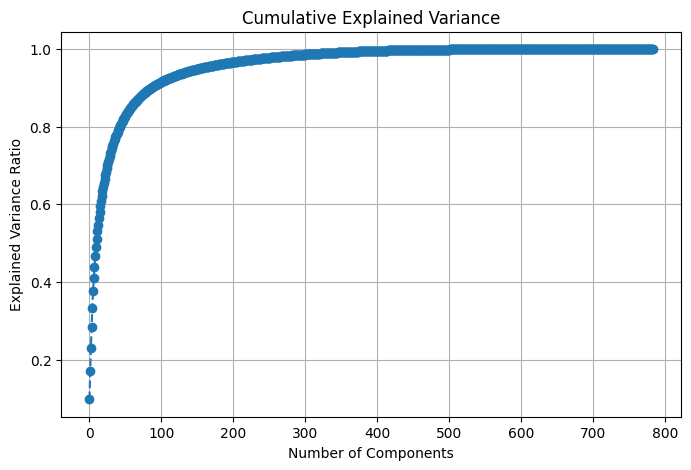

In [75]:
plt.figure(figsize=(8, 5))
plt.plot(explained_variance_ratio, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.grid()
plt.show()

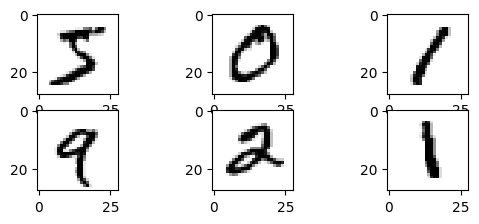

In [40]:
image= mnist.data.to_numpy()
plt.subplot(431)
plt.imshow((image[0].reshape(28,28)), cmap=plt.cm.gray_r, 
interpolation='nearest')
plt.subplot(432)
plt.imshow(image[1].reshape(28,28), cmap=plt.cm.gray_r, 
interpolation='nearest')
plt.subplot(433)
plt.imshow(image[3].reshape(28,28), cmap=plt.cm.gray_r, 
interpolation='nearest')
plt.subplot(434)
plt.imshow(image[4].reshape(28,28), cmap=plt.cm.gray_r, 
interpolation='nearest')
plt.subplot(435)
plt.imshow(image[5].reshape(28,28), cmap=plt.cm.gray_r, 
interpolation='nearest')
plt.subplot(436)
plt.imshow(image[6].reshape(28,28), cmap=plt.cm.gray_r, 
interpolation='nearest')

In [41]:
# Prediksi menggunakan model dengan 10 komponen
sample_predictions_10 = log_reg_10.predict(X_test_pca_10[:10])
print("Prediksi dengan 10 komponen:", sample_predictions_10)
print("Label asli:", y_test[:10].to_numpy())

# Prediksi menggunakan model dengan 30 komponen
sample_predictions_30 = log_reg_30.predict(X_test_pca_30[:10])
print("Prediksi dengan 30 komponen:", sample_predictions_30)
print("Label asli:", y_test[:10].to_numpy())

# Prediksi menggunakan model dengan 50 komponen
sample_predictions_50 = log_reg_50.predict(X_test_pca_50[:10])
print("Prediksi dengan 50 komponen:", sample_predictions_50)
print("Label asli:", y_test[:10].to_numpy())

Prediksi dengan 10 komponen: ['8' '9' '5' '7' '7' '0' '6' '2' '7' '9']
Label asli: ['8' '4' '8' '7' '7' '0' '6' '2' '7' '4']
Prediksi dengan 30 komponen: ['8' '4' '5' '7' '7' '0' '6' '2' '7' '9']
Label asli: ['8' '4' '8' '7' '7' '0' '6' '2' '7' '4']
Prediksi dengan 50 komponen: ['8' '4' '5' '7' '7' '0' '6' '2' '7' '9']
Label asli: ['8' '4' '8' '7' '7' '0' '6' '2' '7' '4']


In [43]:
index_number= np.random.permutation(70000)
x1,y1=mnist.data.loc[index_number],mnist.target.loc[index_number]
x1.reset_index(drop=True,inplace=True)
y1.reset_index(drop=True,inplace=True)
x_train , x_test = x1[:55000], x1[55000:]
y_train , y_test = y1[:55000], y1[55000:]

In [49]:
from sklearn import svm
svc = svm.SVC(gamma='scale', class_weight='balanced', C=100)
svc.fit(x_train, y_train)
result = svc.predict(x_test)
print('Accuracy :', accuracy_score(y_test, result))
print(classification_report(y_test, result))

Accuracy : 0.9845333333333334
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1501
           1       0.99      0.99      0.99      1737
           2       0.98      0.98      0.98      1553
           3       0.99      0.98      0.98      1560
           4       0.97      0.98      0.98      1451
           5       0.98      0.99      0.99      1291
           6       0.98      0.99      0.99      1451
           7       0.98      0.98      0.98      1571
           8       0.99      0.98      0.98      1462
           9       0.98      0.97      0.98      1423

    accuracy                           0.98     15000
   macro avg       0.98      0.98      0.98     15000
weighted avg       0.98      0.98      0.98     15000



In [63]:
#lakukan tes dari hasil prediksi
print("Prediksi dengan SVM:", result[:5])
print("Label asli:", y_test[:5].to_numpy())

Prediksi dengan SVM: ['9' '6' '3' '8' '6']
Label asli: ['4' '6' '3' '8' '6']
